In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1)

In [6]:
y_train.shape

(50000,)

In [ ]:
class_name = ['ariplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
idxes = np.random.randint(50000, size=9)
idxes

array([ 3945, 38406, 12502, 15941, 28118, 47989, 34801,  6799, 10063])

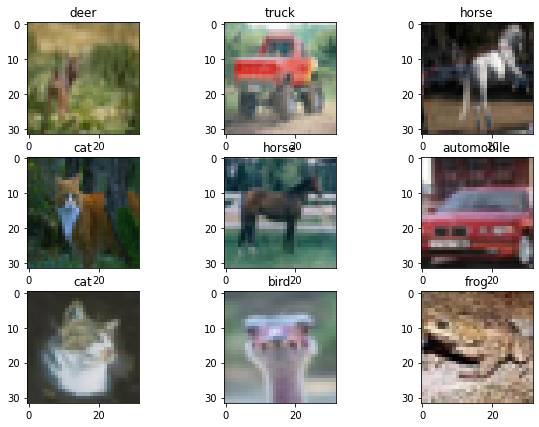

In [ ]:
# fig = plt.figure(figsize=(10,7))
# for i, idx in enumerate(idxes):
#   ax=fig.add_subplot(3,3,i+1)
#   ax.set_title(class_name[y_train[idx]])
#   ax.imshow(X_train[idx])
# plt.show()

In [7]:
# 스케일링

X_train = X_train/255.
X_test = X_test/255.


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train, X_val,y_train, y_val= train_test_split(X_train, y_train, random_state=1213, test_size=0.2)


In [ ]:
# 원핫 인코딩 스킵


In [ ]:
def build_model():
  model= keras.Sequential([
      layers.Conv2D(32,(3,3),input_shape=(32,32,3), activation='relu', padding='same'),
      layers.Conv2D(32,(3,3), activation='relu'),
      layers.MaxPool2D(2,2),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')

  ])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
keras.optimizers.Adam(learning_rate=0.001)
# loss = categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])


In [ ]:
EPOCHS = 5
BATCH_SIZE = 256

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/5
157/157 [==============================] - 14s 16ms/step - loss: 1.6448 - acc: 0.4120 - val_loss: 1.4212 - val_acc: 0.4960
Epoch 2/5
157/157 [==============================] - 2s 13ms/step - loss: 1.2626 - acc: 0.5541 - val_loss: 1.2249 - val_acc: 0.5624
Epoch 3/5
157/157 [==============================] - 2s 13ms/step - loss: 1.1048 - acc: 0.6159 - val_loss: 1.1107 - val_acc: 0.6101
Epoch 4/5
157/157 [==============================] - 2s 13ms/step - loss: 0.9942 - acc: 0.6522 - val_loss: 1.0536 - val_acc: 0.6299
Epoch 5/5
157/157 [==============================] - 2s 13ms/step - loss: 0.9088 - acc: 0.6844 - val_loss: 1.0142 - val_acc: 0.6532


In [ ]:
def build_model_dropout():
  model = keras.Sequential([
      layers.Conv2D(32, (3,3), input_shape=(32, 32, 3),
                    activation='relu', padding = 'same'),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPool2D(2,2),

      layers.Dropout(0.25),

      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPool2D(2,2),

      layers.Flatten(),
      layers.Dropout(0.25),

      layers.Dense(128, activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(10, activation='softmax')                                     
  ])
  return model

In [ ]:
model = build_model_dropout()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                  

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
   monitor='val_loss',
   patience= 3
)

In [ ]:
keras.optimizers.SGD(learning_rate=0.003)
# loss = categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD',
              metrics=['acc'])


In [ ]:
EPOCHS = 30
BATCH_SIZE = 256

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val,y_val), callbacks=[es])


Epoch 1/30
157/157 [==============================] - 5s 27ms/step - loss: 2.3006 - acc: 0.1104 - val_loss: 2.2886 - val_acc: 0.1452
Epoch 2/30
157/157 [==============================] - 4s 26ms/step - loss: 2.2813 - acc: 0.1383 - val_loss: 2.2585 - val_acc: 0.1873
Epoch 3/30
157/157 [==============================] - 4s 25ms/step - loss: 2.2281 - acc: 0.1678 - val_loss: 2.1692 - val_acc: 0.2295
Epoch 4/30
157/157 [==============================] - 4s 25ms/step - loss: 2.1360 - acc: 0.1960 - val_loss: 2.0707 - val_acc: 0.2401
Epoch 5/30
157/157 [==============================] - 4s 25ms/step - loss: 2.0827 - acc: 0.2209 - val_loss: 2.0273 - val_acc: 0.2878
Epoch 6/30
157/157 [==============================] - 4s 25ms/step - loss: 2.0487 - acc: 0.2380 - val_loss: 1.9881 - val_acc: 0.3053
Epoch 7/30
157/157 [==============================] - 4s 25ms/step - loss: 2.0146 - acc: 0.2536 - val_loss: 2.0082 - val_acc: 0.2956
Epoch 8/30
157/157 [==============================] - 4s 25ms/step - 

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8733 - acc: 0.7006


[0.8732932806015015, 0.7006000280380249]

In [ ]:
def build_model_k():
  model = keras.Sequential([
      layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
      layers.BatchNormalization(),
      #layers.Relu(),

      layers.Conv2D(filters=64, kernel_size=3,  activation="relu"),
      layers.MaxPool2D(pool_size=2, strides=2),

      layers.Dropout(0.25),

      layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
      layers.MaxPool2D(pool_size=2, strides=2),

      layers.Flatten(),
      layers.Dropout(0.25),

      layers.Dense(units=128, activation='relu'),
      layers.BatchNormalization(),
      #layers.Relu(),
      layers.Dropout(0.25),
      layers.Dense(units=64, activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(10, activation='softmax')                                     
  ])
  return model

In [ ]:
model_k = tf.keras.models.Sequential()

In [ ]:
model_k.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model_k.add(tf.keras.layers.Dropout(0.25))
model_k.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_k.add(tf.keras.layers.BatchNormalization())
model_k.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model_k.add(tf.keras.layers.Dropout(0.25))
model_k.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_k.add(tf.keras.layers.BatchNormalization())
model_k.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model_k.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_k.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


model_k.add(tf.keras.layers.Flatten())
model_k.add(tf.keras.layers.Dropout(0.25))
model_k.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_k.add(tf.keras.layers.Dropout(0.25))
model_k.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_k.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model_k.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model_k.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["acc"])

In [ ]:
model_k.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val),batch_size=64,callbacks=[es])

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 1.6923 - acc: 0.3812 - val_loss: 1.4095 - val_acc: 0.4894
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.2588 - acc: 0.5490 - val_loss: 1.1220 - val_acc: 0.5962
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.0583 - acc: 0.6286 - val_loss: 0.9915 - val_acc: 0.6533
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9435 - acc: 0.6705 - val_loss: 0.9683 - val_acc: 0.6674
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8520 - acc: 0.7024 - val_loss: 0.8455 - val_acc: 0.7103
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.7948 - acc: 0.7237 - val_loss: 0.8075 - val_acc: 0.7218
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.7465 - acc: 0.7407 - val_loss: 0.7537 - val_acc: 0.7398
Epoch 8/20
625/625 [==============================] - 7s 10ms/step - loss

In [ ]:
model_k.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6137 - acc: 0.7960


[0.6136813163757324, 0.7960000038146973]

새모델


In [ ]:
model2 = tf.keras.models.Sequential()

# 32x32x3
model2.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(tf.keras.layers.BatchNormalization())
# 32x32x3
model2.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
# 16x16x3
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))

# 16x16x3
model2.add(tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
# 16x16x3
model2.add(tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
# 8x8x3
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))

# 8x8x3
model2.add(tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
# 8x8x3
model2.add(tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
# 4x4x3
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(2048, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(2048, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

NameError: ignored

In [ ]:
history = model2.fit_generator(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    verbose=1)